# IWDS20
## Linear Regression: Tutorial (Solution)

In statistics, regression analysis is a statistical process for estimating the relationships among variables...More specifically, regression analysis helps one understand how the typical value of the dependent variable (or criterion variable) changes when any one of the independent variables is varied, while the other independent variables are held fixed.

Linear regression is an approach for predicting a quantitative response using a single feature (or predictor or input variable).

### Dataset
We are going to use the advertising dataset from "An Introduction to Statistical Learning with Applications in R" book. It is provided with the book code, and can also be downloaded from http://www-bcf.usc.edu/~gareth/ISL/data.html.

You can download it using the link above and then upload the csv file next to the notebook here.

Import the Python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-white')

Let's load the csv file using pandas library and explore it a bit. Use "usecols" parameter to only include the columns 1, 2, 3, 4 

In [2]:
data = pd.read_csv('Advertising.csv', usecols=[1,2,3,4])

Show the first few rows of the dataset

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Explore the dataset further by using methods dftypes, info(), shape

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
data.shape

(200, 4)

In [6]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Plot the relationship between TV and sales columns using plot function

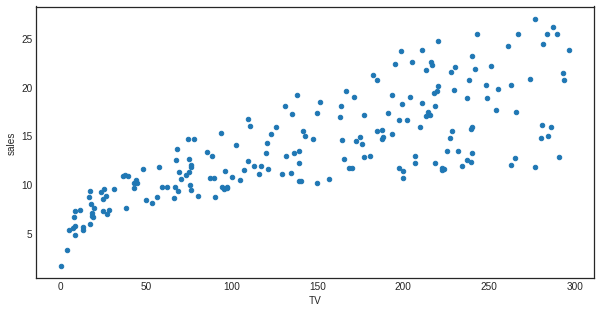

In [7]:
data.plot(kind='scatter', x='TV', y='sales', figsize=(10,5))

## Simple Linear Regression

Let's import the Python libraries that we might need to build a LinearRegression model (use sklearn library)


In [8]:
import sklearn.linear_model as skl_lm

Let's create an instance of the LinearRegression model

In [9]:
model = skl_lm.LinearRegression()

Let's define features X and a label Y. We are building a simple linear regression model, where we will use only one feature "TV" to predict label "sales"

In [10]:
features = ['TV']
X = data[features]
y = data.sales

X_train, y_train = X[:150], y[:150]
X_test, y_test = X[150:], y[150:]

Let's fit the data to the model

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's explore the the intercept and coefficients of the model

In [12]:
print(model.intercept_)
print(model.coef_)

7.1107320844468545
[0.04906288]


Let's use X_test data to generate our predictions

In [13]:
sales_pred = model.predict(X_test)

Let's explore a few metrics: 
* r2_score (Coefficient of determination) - a statistical measure of how close the data is to the fitted regression line. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a r2score of 0.0. [more info](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
* MSE (Mean Squared error) - explore on your own
* Variance score - explore on your own

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
# The coefficients
fc = zip(features, model.coef_)
print('Coefficients: \n', list(fc))

# The mean squared error
mse = mean_squared_error(y_test, sales_pred)
print("Mean squared error: %.2f" % mse)
# Explained variance score: 1 is perfect prediction
r2score = r2_score(y_test, sales_pred)
print('Variance score: %.2f' % r2score)

Coefficients: 
 [('TV', 0.04906288039571124)]
Mean squared error: 13.17
Variance score: 0.49


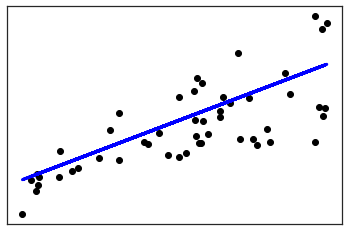

In [16]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, sales_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## [Optional]

If we have spare time - re-run solution but use all three features (['TV', 'radio', 'newspaper']) when creating a model


In [17]:
new_features = ['TV', 'radio', 'newspaper']
X = data[new_features]
y = data.sales

X_train, y_train = X[:150], y[:150]
X_test, y_test = X[150:], y[150:]

new_model = skl_lm.LinearRegression()
new_model.fit(X_train, y_train)
new_sales_pred = new_model.predict(X_test)

# The coefficients
fc = zip(new_features, new_model.coef_)
print('Coefficients: \n', list(fc))

# The mean squared error
mse = mean_squared_error(y_test, new_sales_pred)
print("Mean squared error: %.2f" % mse)
# Explained variance score: 1 is perfect prediction
r2score = r2_score(y_test, new_sales_pred)
print('Variance score: %.2f' % r2score)

Coefficients: 
 [('TV', 0.0470001192292681), ('radio', 0.17993257121158732), ('newspaper', -0.0014027331700707864)]
Mean squared error: 2.67
Variance score: 0.90
